## Ajuste lineal de brillo y contraste




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import misc

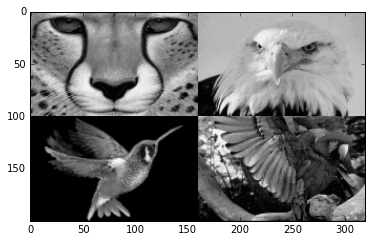

In [2]:
from PIL import Image
img= Image.open(r'animal.tfe.bmp')
#plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.imshow(img)

Convertimos la imagen a array


In [3]:
img2= misc.imread('animal.tfe.bmp')
#misc.imsave('img.bmp', img)
type(img2)
img2.shape

(200, 320, 3)

Calculo el histograma

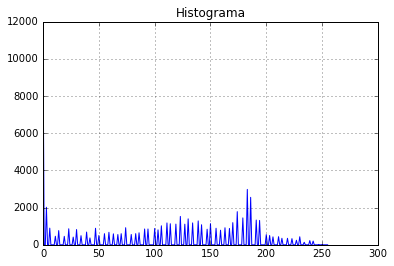

In [4]:
histograma=np.zeros(256, dtype=np.int)

for i in range(0,319):
    for j in range(0,199):
        k=img2[j,i,0] 
        histograma[k]=histograma[k]+1

plt.title('Histograma')      
plt.plot(histograma)
plt.grid(True)

Calcular la media y la desviación típica a través del histograma

media = 1/size-imagen sum h(k)*k

In [5]:
suma = 0
for i in range (0,255):
    suma = suma + i * histograma[i]
media = suma / (320 *200)

print ("Brillo de la imagen = ", media)

Brillo de la imagen =  101.84396875


Desviación típica


In [6]:
suma2 = 0

for i in range (0,255):
    suma2 = suma2 + ( histograma[i] * (i - media)**2 ) 
   
desviacion = np.sqrt(suma2/(320*200) )
print ("Contraste =", desviacion)


Contraste = 73.0556604157


Valores de brillo y contraste nuevo

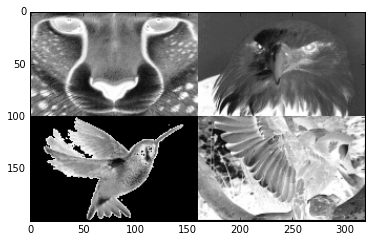

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

@interact ( nuevaMedia=widgets.IntSlider(min=0,max=255,step=1,value=media), nuevaDesviacion=widgets.IntSlider(min=0,max=255,step=1,value=desviacion))
def ajuste (nuevaMedia, nuevaDesviacion):
    a = nuevaDesviacion / desviacion
    b = nuevaMedia - ( a * media)

    tablaTransformacion = np.zeros(256 , dtype=np.float64)

    for i in range (0,255):
        valor = int( a*i+b)
        if valor > 255:
            valor = 255
        elif valor < 0:
            valor = 0
        tablaTransformacion[i]= valor

    img3 = np.zeros((200, 320, 3))
    for i in range(0,319):
        for j in range(0,199):
            vin=img2[j,i,0] 
            vout=tablaTransformacion[vin] 
            img3[j,i,:]=vout
            
    plt.imshow(img3)


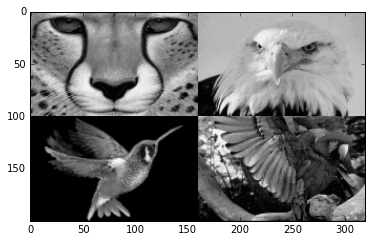

In [8]:
plt.imshow(img2)